In [1]:
import numpy as np
import pandas as pd
%display typeset

In [2]:
def model(t, y, params):
    S, E, I, A, H, R, C, D = y
    chi, phi, beta, rho, delta, gamma, alpha, mu, p, q, r = params
    lamb = beta * (I + A)
    # Turns on Quarantine on day q and off on day q+r
    chi *= ((1 + np.tanh(t - q)) / 2) * ((1 - np.tanh(t - (q + r))) / 2)
    return [
        -lamb * ((1 - chi) * S),  # dS/dt
        lamb * ((1 - chi) * S) - alpha * E,  # dE/dt
        (1 - p) * alpha * E - delta * I - phi * I,  # dI/dt
        p * alpha * E - gamma * A,
        phi * I - (rho + mu) * H,  # dH/dt
        delta * I + rho * H + gamma * A,  # dR/dt
        phi * I,  # (1-p)*alpha*E+ p*alpha*E # Hospit. acumuladas
        mu * H  # Morte acumuladas
    ]

In [3]:
chi = .3
phi = 0.012413633926076584
beta = 0.27272459855759813
rho = 0.2190519831830368
delta = 0.04168480042146949
gamma = 0.04
alpha =  0.3413355572047603
mu = 0.02359234606623134
p = 0.7693029079871165
q = 50
r = 55

In [4]:
T = ode_solver()
T.function = model
T.algorithm='rk8pd'
inits = [.99, 0, 1e-4, 0, 0, 0, 0, 0]
tspan = [0,200]
T.ode_solve(tspan, inits, num_points=200, params=[chi,phi,beta,rho,delta,gamma,alpha,mu,p,q,r])

In [6]:
def get_sim_array(sol):
    sim = np.array([y for t,y in sol])
    return sim
get_sim_array(T.solution)

array([[9.90000000e-01, 0.00000000e+00, 1.00000000e-04, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [9.89973344e-01, 2.25755111e-05, 9.56580086e-05, ...,
        4.23720621e-06, 1.21233870e-06, 1.33047275e-08],
       [9.89946090e-01, 3.91711356e-05, 9.30197071e-05, ...,
        8.76177490e-06, 2.38193156e-06, 4.86367287e-08],
       ...,
       [7.05921911e-03, 4.50726801e-05, 5.18874882e-04, ...,
        9.70886461e-01, 5.19350779e-02, 5.04644718e-03],
       [7.04595718e-03, 4.32611015e-05, 4.94934735e-04, ...,
        9.71170175e-01, 5.19413692e-02, 5.04720754e-03],
       [7.03322409e-03, 4.15259091e-05, 4.72119417e-04, ...,
        9.71443013e-01, 5.19473704e-02, 5.04793268e-03]])

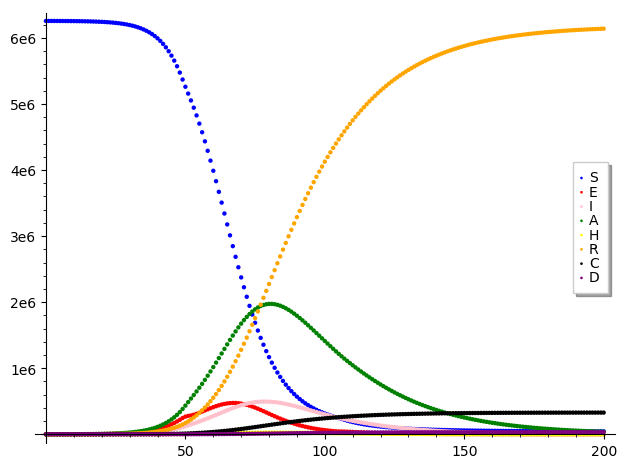

In [7]:
popRJ = 6.32e6
def plot_sol(sol):
    sim = get_sim_array(sol)*popRJ
    P = list_plot(sim[:,0],legend_label='S')
    colors = ['blue','red','pink','green','yellow','orange','black','purple']
    for i,var in enumerate(['E','I','A','H','R','C','D']):
        P += list_plot(sim[:,i+1],color=colors[i+1],legend_label=var)
   
    show(P)
plot_sol(T.solution)